# Pembuatan Dataset Sintetis

In [11]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

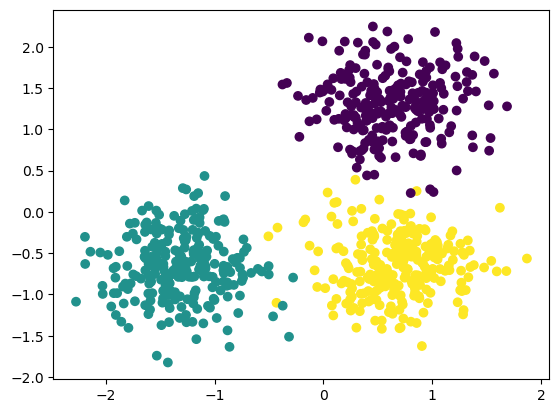

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels_true)
plt.show()

# Compute DBSCAN

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


# Evaluasi Kualitas Klasterisasi

In [14]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

homogeneity = homogeneity_score(labels_true, labels)
completeness = completeness_score(labels_true, labels)
v_measure = v_measure_score(labels_true, labels)
adjusted_rand_index = adjusted_rand_score(labels_true, labels)
adjusted_mutual_info = adjusted_mutual_info_score(labels_true, labels)
silhouette = silhouette_score(X, labels)

print("Homogeneity: %.3f" % homogeneity)
print("Completeness: %.3f" % completeness)
print("V-measure: %.3f" % v_measure)
print("Adjusted Rand Index: %.3f" % adjusted_rand_index)
print("Adjusted Mutual Information: %.3f" % adjusted_mutual_info)
print("Silhouette Coefficient: %.3f" % silhouette)

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


# Visualisasi Hasil Klasterisasi

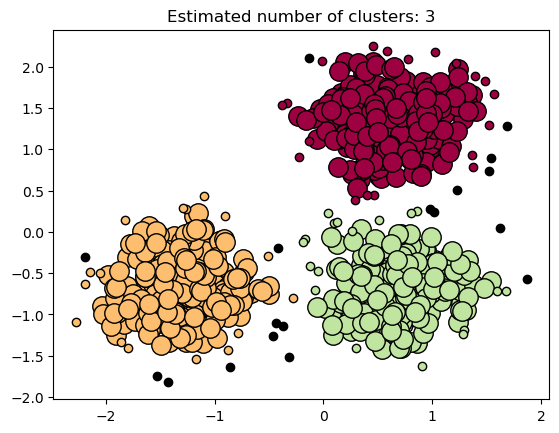

In [15]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Plot border/noise samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
